## Enterprise Analytics Final Project
**Thara Dawoodjee** 260611737   
**Tamar Bulka** 260679959     
**Kyle Gomes** 260664617   
**Francis McGuire** 260915465  

The Vinho Verde region in northwest Portugal is home to thousands of wine makers and is one of the oldest wine regions in the world. Red Vinho Verde wines are highly valued and frequently awarded in national and international competitions. As a result, there has been major investments in the Vinho Verde region with new vineyards, planting systems, and a new generation of winemakers. 

To continue this success and produce top-quality wines, the objective of this project is to create an accurate regression model that can predict the quality of red Vinho Verde wines. Furthermore, to investigate the various physiochemical properties that produce a high quality red wines. The results of this project can help wine makers in the Vinho Verde region decide if they should produce new red wine variants or not (depending on the levels of the physiochemical levels in the red wine and the predicted wine quality). 

## Set-up

In [47]:
import pandas as pd
import numpy as np
import seaborn as sn

# For figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [48]:
wine = pd.read_csv("RedWines.csv")

In [49]:
wine = wine.drop("Unnamed: 0", axis = 1)
wine = wine.drop_duplicates()

## Discover and Visualize the Data to Gain Insights

**Data Exploration Description**

The dataset used for this project consists of 11 physiochemical properties that can be measured in wine, as well as the wine's quality score. The pysiochemical properties include variables such as acidity, pH and chlorides, and are all numerical values. Chlorides, density, fixed acidity, pH and volatile acidity all have relatively normal distributions, while the other features are more skewed or have no discernable distribution. Some notable correlations are fixed acidity and pH (-.69), as well as citric acid and pH (-.55). Both of these strong correlations make sense as pH is a measure of acidity. Furthermore, we can see that alcohol (0.476), volatile acidity (-0.391), sulphates (0.251) and citric acid (0.226) are the physiochemical properties that have the strongest correlation with red wine quality. These insights are clearly displayed in the following charts and plots. 

The features used are defined below:  
**Acidity:** this varirable is divided into "fixed acidity", "volatile acidity", and "citric acid" and is measured in grams of acid per cubic decimeter  
**Residual Sugar:** amount of sugar that is remaining after fermentation stops, and is measured in grams per cubic decimeter    
**Chlorides:** amount of salt measured in grams per cubic decimeter   
**Sulfur Dioxide:** this variable is divided in two, namely "total sulfur dioxide" and "free sulfur dioxide" and is measured in millgram of sulfur dioxide per cubic decimeter   
**Density:** density of the wine measured in grams per centimeter cubed   
**pH:** a scale used to measure how acidic or basic a wine is    
**Sulphates:** an additive to wines containing potassium sulphate that acts as an antimicrobial and antioxidant, and is measured in grams per cubic decimeter    
**Alcohol:** percent of alcohol in the red wine   
**Quality:** a score given to each variant that ranges from 0 to 10   

**Univariate Analysis**

In [50]:
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [51]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
fixed.acidity           1359 non-null float64
volatile.acidity        1359 non-null float64
citric.acid             1359 non-null float64
residual.sugar          1359 non-null float64
chlorides               1359 non-null float64
free.sulfur.dioxide     1359 non-null float64
total.sulfur.dioxide    1359 non-null float64
density                 1359 non-null float64
pH                      1359 non-null float64
sulphates               1359 non-null float64
alcohol                 1359 non-null float64
quality                 1359 non-null int64
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [52]:
wine.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [53]:
wine["quality"].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

Most red wines have a quality of 5 or 6, with very few wines having a quality greater than 7 or less than 4. 

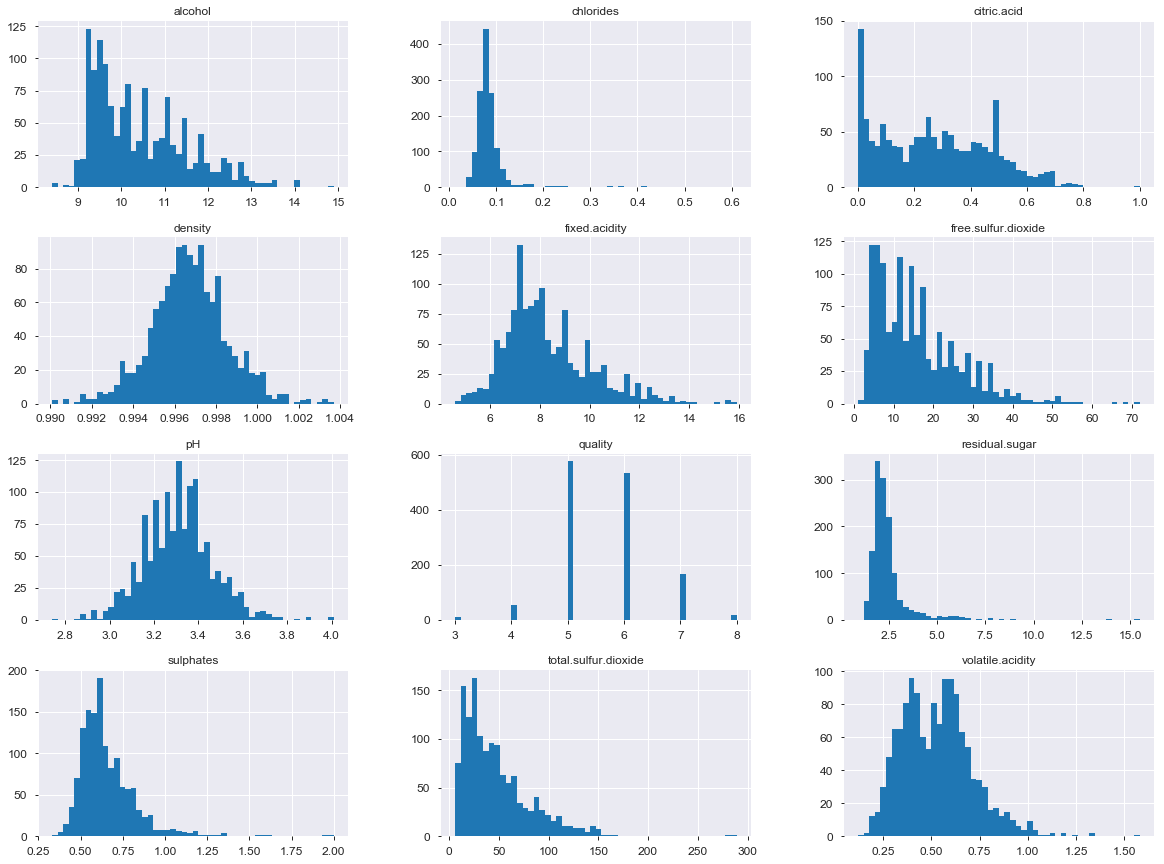

In [54]:
wine.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

**Multivariate Analysis**

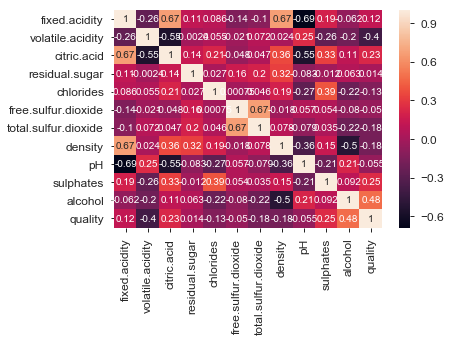

In [191]:
corrMatrix = wine.corr()
sn.heatmap(corrMatrix, annot=True)

In [56]:
corrMatrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric.acid             0.228057
fixed.acidity           0.119024
residual.sugar          0.013640
free.sulfur.dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total.sulfur.dioxide   -0.177855
density                -0.184252
volatile.acidity       -0.395214
Name: quality, dtype: float64

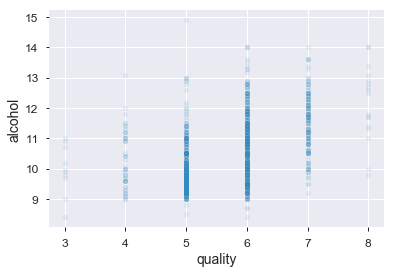

In [57]:
wine.plot(kind="scatter", x="quality", y="alcohol", alpha=0.1)

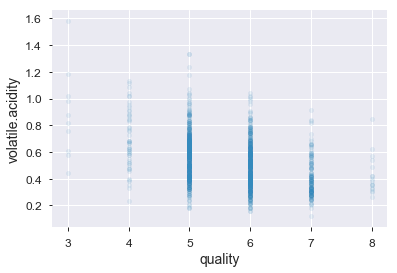

In [58]:
wine.plot(kind="scatter", x="quality", y="volatile.acidity", alpha=0.1)

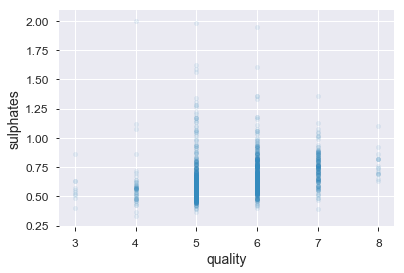

In [59]:
wine.plot(kind="scatter", x="quality", y="sulphates", alpha=0.1)

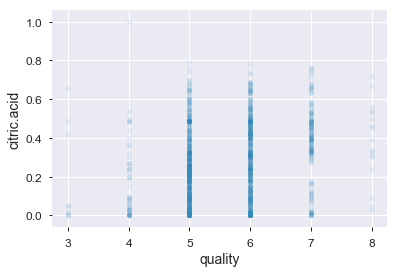

In [60]:
wine.plot(kind="scatter", x="quality", y="citric.acid", alpha=0.1)

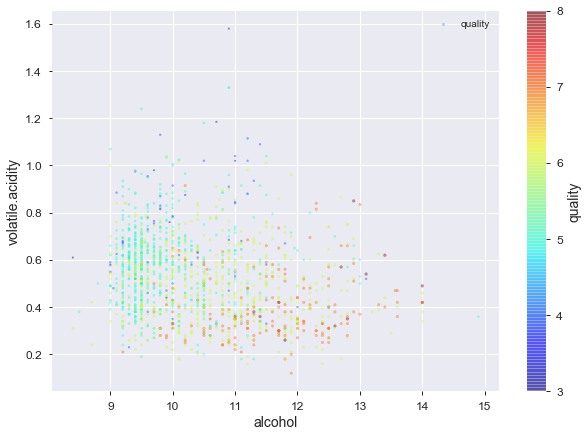

In [61]:
wine.plot(kind="scatter", x="alcohol", y="volatile.acidity", alpha=0.4,
            s=wine["quality"], label="quality",figsize=(10,7),
            c="quality", cmap=plt.get_cmap("jet"), colorbar=True,
            sharex=False)
plt.legend()

The plot above shows that high quality wines have an alcohol level around 11.5% and volatile acidity of 0.4g/dm3. Whereas low quality wines have an alcohol level of 10% and and volatile acidity of 0.55 g/dm3.

## Pandas Profiling

In [62]:
from pandas_profiling import ProfileReport

In [63]:
profile = ProfileReport(wine, title='Pandas Profiling Report')

In [64]:
profile

## Causal Inference

## Model 1: Treatment = Alcohol
**Creating a Causal Model**  

In [167]:
# Setting up the data
df = wine
treatment_name = ["alcohol"]
outcome_name = ["quality"]
common_causes_names = ["volatile.acidity", "sulphates", "citric.acid", "total.sulfur.dioxide", "density"]
instrument_names = ["fixed.acidity", "chlorides", "pH", "free.sulfur.dioxide", "residual.sugar"]

In [168]:
# Creating a causal model from the data
from dowhy import CausalModel
model = CausalModel(
    data=df,
    treatment=treatment_name,
    outcome=outcome_name,
    common_causes=common_causes_names)

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['alcohol'] on outcome ['quality']


**Viewing the Model**

In [170]:
model.view_model()

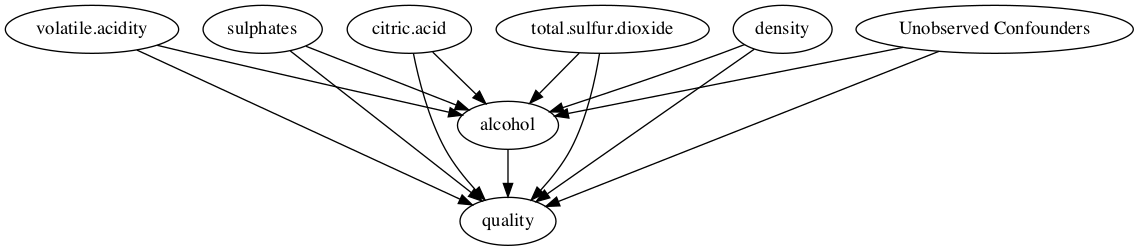

In [171]:
# Viewing model
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

**Identifying the Effect**

In [172]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['volatile.acidity', 'sulphates', 'U', 'citric.acid', 'density', 'total.sulfur.dioxide']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                         
──────────(Expectation(quality|volatile.acidity,sulphates,citric.acid,density,
d[alcohol]                                                                    

                      
total.sulfur.dioxide))
                      
Estimand assumption 1, Unconfoundedness: If U→{alcohol} and U→quality then P(quality|alcohol,volatile.acidity,sulphates,citric.acid,density,total.sulfur.dioxide,U) = P(quality|alcohol,volatile.acidity,sulphates,citric.acid,density,total.sulfur.dioxide)
### Estimand : 2
Estimand name: iv
No such variable found!



**Estimating the Effect**

In [173]:
# Estimating the target estimand using a linear method
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.linear_regression",test_significance=True)

print(estimate)
print("Causal Estimate is " + str(estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: quality~alcohol+volatile.acidity+sulphates+citric.acid+density+total.sulfur.dioxide


*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                         
──────────(Expectation(quality|volatile.acidity,sulphates,citric.acid,density,
d[alcohol]                                                                    

                      
total.sulfur.dioxide))
                      
Estimand assumption 1, Unconfoundedness: If U→{alcohol} and U→quality then P(quality|alcohol,volatile.acidity,sulphates,citric.acid,density,total.sulfur.dioxide,U) = P(quality|alcohol,volatile.acidity,sulphates,citric.acid,density,total.sulfur.dioxide)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: quality~alcohol+volatile.acidity+sulphates+citric.acid+density+total.sulfur.dioxide
## Estimate
Value: 0.3103798047340596

## Statistical Significance
p-value: <0.001

Causal Estimate is 0.3103798047340596


Alcohol has a significant positive causal effect on the quality of red wine since the p-value is less than 0.001. 

## Model 2: Treatment = Volatile Acidity   
**Creating a Causal Model**  

In [174]:
# Setting up the data
df = wine
treatment_name = ["volatile.acidity"]
outcome_name = ["quality"]
common_causes_names = ["alcohol", "sulphates", "citric.acid", "total.sulfur.dioxide", "density"]
instrument_names = ["fixed.acidity", "chlorides", "pH", "free.sulfur.dioxide", "residual.sugar"]

In [175]:
# Creating a causal model from the data
from dowhy import CausalModel
model = CausalModel(
    data=df,
    treatment=treatment_name,
    outcome=outcome_name,
    common_causes=common_causes_names)

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['volatile.acidity'] on outcome ['quality']


**Viewing the Model**

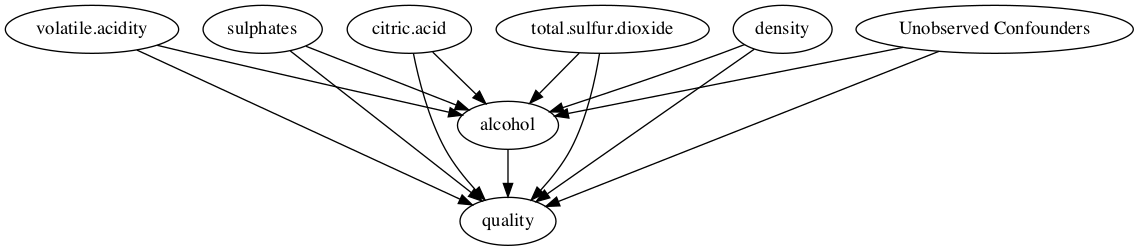

In [176]:
# Viewing model
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

**Identifying the Effect**

In [177]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['alcohol', 'sulphates', 'U', 'citric.acid', 'density', 'total.sulfur.dioxide']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                                                    
───────────────────(Expectation(quality|alcohol,sulphates,citric.acid,density,
d[volatile.acidity]                                                           

                      
total.sulfur.dioxide))
                      
Estimand assumption 1, Unconfoundedness: If U→{volatile.acidity} and U→quality then P(quality|volatile.acidity,alcohol,sulphates,citric.acid,density,total.sulfur.dioxide,U) = P(quality|volatile.acidity,alcohol,sulphates,citric.acid,density,total.sulfur.dioxide)
### Estimand : 2
Estimand name: iv
No such variable found!



**Estimating the Effect**

In [178]:
# Estimating the target estimand using a linear method
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.linear_regression",test_significance=True)

print(estimate)
print("Causal Estimate is " + str(estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: quality~volatile.acidity+alcohol+sulphates+citric.acid+density+total.sulfur.dioxide


*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                                                    
───────────────────(Expectation(quality|alcohol,sulphates,citric.acid,density,
d[volatile.acidity]                                                           

                      
total.sulfur.dioxide))
                      
Estimand assumption 1, Unconfoundedness: If U→{volatile.acidity} and U→quality then P(quality|volatile.acidity,alcohol,sulphates,citric.acid,density,total.sulfur.dioxide,U) = P(quality|volatile.acidity,alcohol,sulphates,citric.acid,density,total.sulfur.dioxide)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: quality~volatile.acidity+alcohol+sulphates+citric.acid+density+total.sulfur.dioxide
## Estimate
Value: -1.2847556717063968

## Statistical Significance
p-value: <0.001

Causal Estimate is -1.2847556717063968


Volatile acidity has a significant negative causal effect on the quality of red wine since the p-value is less than 0.001. 

## Model 3: Treatment = Sulphates  
**Creating a Causal Model**  

In [179]:
# Setting up the data
df = wine
treatment_name = ["sulphates"]
outcome_name = ["quality"]
common_causes_names = ["alcohol","volatile.acidity", "citric.acid", "total.sulfur.dioxide", "density"]
instrument_names = ["fixed.acidity", "chlorides", "pH", "free.sulfur.dioxide", "residual.sugar"]

In [180]:
# Creating a causal model from the data
from dowhy import CausalModel
model = CausalModel(
    data=df,
    treatment=treatment_name,
    outcome=outcome_name,
    common_causes=common_causes_names)

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['sulphates'] on outcome ['quality']


**Viewing the Model**

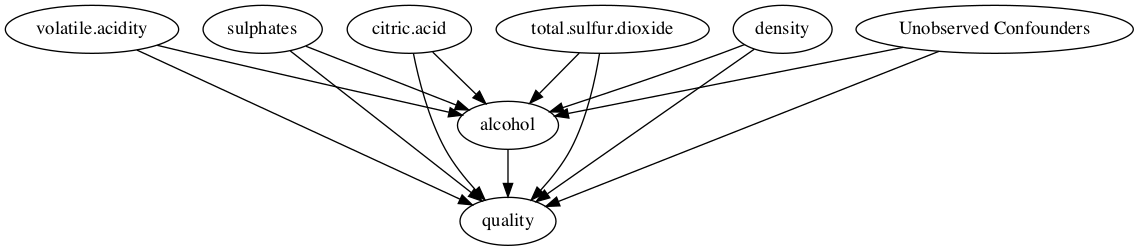

In [181]:
# Viewing model
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

**Identifying the Effect**

In [182]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['alcohol', 'volatile.acidity', 'U', 'citric.acid', 'density', 'total.sulfur.dioxide']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(quality|alcohol,volatile.acidity,citric.acid,density,
d[sulphates]                                                                  

                      
total.sulfur.dioxide))
                      
Estimand assumption 1, Unconfoundedness: If U→{sulphates} and U→quality then P(quality|sulphates,alcohol,volatile.acidity,citric.acid,density,total.sulfur.dioxide,U) = P(quality|sulphates,alcohol,volatile.acidity,citric.acid,density,total.sulfur.dioxide)
### Estimand : 2
Estimand name: iv
No such variable found!



**Estimating the Effect**

In [183]:
# Estimating the target estimand using a linear method
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.linear_regression",test_significance=True)

print(estimate)
print("Causal Estimate is " + str(estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: quality~sulphates+alcohol+volatile.acidity+citric.acid+density+total.sulfur.dioxide


*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(quality|alcohol,volatile.acidity,citric.acid,density,
d[sulphates]                                                                  

                      
total.sulfur.dioxide))
                      
Estimand assumption 1, Unconfoundedness: If U→{sulphates} and U→quality then P(quality|sulphates,alcohol,volatile.acidity,citric.acid,density,total.sulfur.dioxide,U) = P(quality|sulphates,alcohol,volatile.acidity,citric.acid,density,total.sulfur.dioxide)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: quality~sulphates+alcohol+volatile.acidity+citric.acid+density+total.sulfur.dioxide
## Estimate
Value: 0.7013331395160298

## Statistical Significance
p-value: <0.001

Causal Estimate is 0.7013331395160298


Sulphates has a significant positive causal effect on the quality of red wine since the p-value is less than 0.001. 

## Model 4: Treatment = Citric Acid
**Creating a Causal Model**  

In [184]:
# Setting up the data
df = wine
treatment_name = ["citric.acid"]
outcome_name = ["quality"]
common_causes_names = ["alcohol","volatile.acidity", "sulphates", "total.sulfur.dioxide", "density"]
instrument_names = ["fixed.acidity", "chlorides", "pH", "free.sulfur.dioxide", "residual.sugar"]

In [185]:
# Creating a causal model from the data
from dowhy import CausalModel
model = CausalModel(
    data=df,
    treatment=treatment_name,
    outcome=outcome_name,
    common_causes=common_causes_names)

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['citric.acid'] on outcome ['quality']


**Viewing the Model**

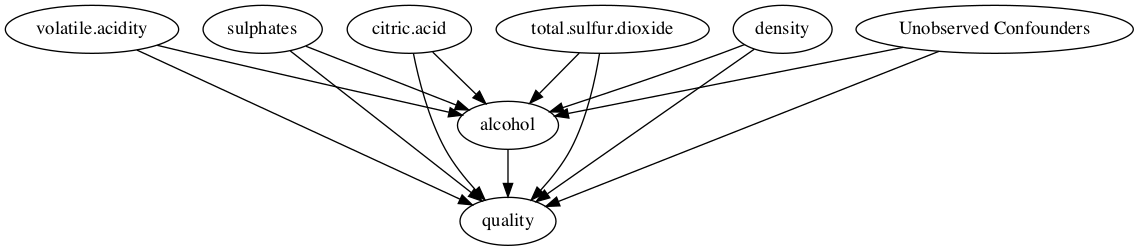

In [186]:
# Viewing model
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

**Identifying the Effect**

In [187]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['alcohol', 'volatile.acidity', 'sulphates', 'U', 'density', 'total.sulfur.dioxide']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
──────────────(Expectation(quality|alcohol,volatile.acidity,sulphates,density,
d[citric.acid]                                                                

                      
total.sulfur.dioxide))
                      
Estimand assumption 1, Unconfoundedness: If U→{citric.acid} and U→quality then P(quality|citric.acid,alcohol,volatile.acidity,sulphates,density,total.sulfur.dioxide,U) = P(quality|citric.acid,alcohol,volatile.acidity,sulphates,density,total.sulfur.dioxide)
### Estimand : 2
Estimand name: iv
No such variable found!



**Estimating the Effect**

In [188]:
# Estimating the target estimand using a linear method
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.linear_regression",test_significance=True)

print(estimate)
print("Causal Estimate is " + str(estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: quality~citric.acid+alcohol+volatile.acidity+sulphates+density+total.sulfur.dioxide


*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
──────────────(Expectation(quality|alcohol,volatile.acidity,sulphates,density,
d[citric.acid]                                                                

                      
total.sulfur.dioxide))
                      
Estimand assumption 1, Unconfoundedness: If U→{citric.acid} and U→quality then P(quality|citric.acid,alcohol,volatile.acidity,sulphates,density,total.sulfur.dioxide,U) = P(quality|citric.acid,alcohol,volatile.acidity,sulphates,density,total.sulfur.dioxide)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: quality~citric.acid+alcohol+volatile.acidity+sulphates+density+total.sulfur.dioxide
## Estimate
Value: -0.10028661081012569

## Statistical Significance
p-value: 0.273

Causal Estimate is -0.10028661081012569


Citric acid does not have a significant negative causal effect on the quality of red wine since the p-value is greater than 0.001. 

From the causal inference models, it is clear that only alcohol, volatile acidity and sulphates have a causal relationship with the quality of red wine. 

## Feature Selection

In [189]:
X = wine.iloc[:,0:11]
y = wine["quality"]

from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(random_state=0, n_estimators=1)

model = randomforest.fit(X,y)

from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(model, threshold = 0.05)
sfm.fit(X,y)
for feature_list_index in sfm.get_support(indices=True):
    print(X.columns[feature_list_index])
    
pd.DataFrame(list(zip(X.columns,model.feature_importances_)), columns = ['predictor','Gini coefficient'])

fixed.acidity
volatile.acidity
citric.acid
residual.sugar
free.sulfur.dioxide
total.sulfur.dioxide
density
pH
sulphates
alcohol


,predictor,Gini coefficient
0,fixed.acidity,0.071037
1,volatile.acidity,0.115071
2,citric.acid,0.050345
3,residual.sugar,0.076956
4,chlorides,0.047839
5,free.sulfur.dioxide,0.063223
6,total.sulfur.dioxide,0.127596
7,density,0.099455
8,pH,0.106498
9,sulphates,0.133987


All features look relatively important in predicting red wine quality and will be kept and passed to the TPOT Optimizer to evaluate and find the best pipeline. 

## TPOT AutoML

In [86]:
from tpot import TPOTRegressor
from sklearn.metrics import make_scorer

In [87]:
X = wine.iloc[:,0:11]
y = wine["quality"]

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 5)

In [89]:
# Make a custom metric function
def my_custom_accuracy(y_true, y_pred):
    return float(sum(y_pred == y_true)) / len(y_true)

# Make a custom a scorer from the custom metric function
# Note: greater_is_better=False in make_scorer below would mean that the scoring function should be minimized.
my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

In [90]:
pipeline_optimizer = TPOTRegressor(generations=10, population_size=20, cv=5, random_state = 5,
                                   verbosity = 2, scoring=my_custom_scorer)

In [91]:
pipeline_optimizer.fit(np.array(X_train),np.array(y_train).ravel())

print(pipeline_optimizer.score(X_test, y_test))
pipeline_optimizer.export("tpot_exported_pipeline.py")

Generation 1 - Current best internal CV score: 0.089010989010989
Generation 2 - Current best internal CV score: 0.089010989010989
Generation 3 - Current best internal CV score: 0.10109890109890111
Generation 4 - Current best internal CV score: 0.11318681318681319
Generation 5 - Current best internal CV score: 0.48901098901098905
Generation 6 - Current best internal CV score: 0.48901098901098905
Generation 7 - Current best internal CV score: 0.48901098901098905
Generation 8 - Current best internal CV score: 0.4967032967032967
Generation 9 - Current best internal CV score: 0.4967032967032967
Generation 10 - Current best internal CV score: 0.5010989010989011

Best pipeline: DecisionTreeRegressor(KNeighborsRegressor(RidgeCV(input_matrix), n_neighbors=37, p=2, weights=distance), max_depth=4, min_samples_leaf=7, min_samples_split=3)
0.6146993318485523


## Predictions

The pipeline created can help wine makers predict if new variants will result in high quality red wines or not. The levels of each physiochemical property were randomly drawn from its columns distribution. Three hypothetical wines were tested to show how wine makers could use the pipeline to predict the quality of a new variant so that they can have a better idea whether or not to prduce and invest in the new variant. This would be an import step to add to their wine making process as as it could have an impact on their revenue and customer satisfaction. 

**Variant 1**

In [124]:
variant1 = pd.DataFrame([[7.6,0.610,0.43,1.9,0.089,5,28,0.99382,3.31,0.62,11.30]])

In [126]:
results1 = pipeline_optimizer.predict(np.array(variant1))

In [127]:
print(results1)

[6.]


**Variant 2**

In [129]:
variant2 = pd.DataFrame([[5.6,1.025,0.10,2.9,0.097,8,36,0.99837,3.64,0.68,10.45]])

In [130]:
results2 = pipeline_optimizer.predict(np.array(variant2))

In [131]:
print(results2)

[5.]


**Variant 3**

In [162]:
variant3 = pd.DataFrame([[4.4,0.10,0.39,1.4,0.063,11,32,0.99284,3.20,0.70,13]])

In [163]:
results3 = pipeline_optimizer.predict(np.array(variant3))

In [164]:
print(results3)

[6.]


## Conclusion

From the analyses demonstrated above, we can conclude that alcohol and sulfates have a positive causal relationship with quality, while volatile acidity has a negative causal relationship with quality. That said, all 11 varibles used proved to be significant in predicting quality according to random forest feature selection, even if they do not have a causal effect. Furthermore, the MSE for our predictive model is 0.614, implying that our model is highly accurate. The model could be very helpful for a wine producer in this region as it could save him or her from producing low quality wine in high quantities. However, further analysis could be done on the purchasing habits of consumers to better asses the value of the various wines as opposed to the quality. For example, if people tend to buy more of the low quality wine, then the producer should consider making more